# Exploratory Data Analysis for Diabetes Dataset

In [382]:
#!pip install libraries
#!pip install seaborn
#!pip install bioinfokit
#!pip install statsmodels
#!pip install scikit_posthocs
#!pip install pingouin

In [383]:
#Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

from sklearn.linear_model import LinearRegression

import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

import scipy
from scipy import stats

from bioinfokit.analys import stat


# Getting to Know Dataset

Importing and checking columns, rows, datatype, and dimension.

In [384]:
#Import csv file as pandas dataframe
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [385]:
#Exploring data characteristics
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [386]:
for col in diabetes.columns: 
    print(col) 

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [387]:
#Checking data types in dataframe
col_types = diabetes.dtypes
col_types

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [388]:
#Checking dimensions of the dataframe
dims = diabetes.shape
dims

(768, 9)

In [389]:
#Unique value counts for Pregnancy
Preg_freqs = diabetes['Pregnancies'].value_counts()
Preg_freqs

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [390]:
#Unique value counts for Glucose
Glu_freqs = diabetes['Glucose'].value_counts()
Glu_freqs

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [391]:
#Unique value counts for BloodPressure
Blood_freqs = diabetes['BloodPressure'].value_counts()
Blood_freqs

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

In [392]:
#Unique value counts for SkinThickness
Skin_freqs = diabetes['SkinThickness'].value_counts()
Skin_freqs

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [393]:
#Unique value counts for Insulin
Ins_freqs = diabetes['Insulin'].value_counts()
Ins_freqs

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [394]:
#Unique value counts for BMI
BMI_freqs = diabetes['BMI'].value_counts()
BMI_freqs

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [395]:
#Unique value counts for DiabetesPedigreeFunction
Dia_freqs = diabetes['DiabetesPedigreeFunction'].value_counts()
Dia_freqs

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

In [396]:
#Unique value counts for Outcome
Outcome_freqs = diabetes['Outcome'].value_counts()
Outcome_freqs

0    500
1    268
Name: Outcome, dtype: int64

# Data Cleaning

Cleaning Diabetes dataset using tidy data principles.

In [397]:
#Dropping Outcome column
#y_variables = diabetes.Outcome.values
#to_drop = ['Outcome']
#x_variables = diabetes.drop(columns=to_drop, inplace=True)
#diabetes.head()

In [398]:
#Updating zero values of Glucose using Boolean filtering 
diabetes.loc[diabetes['Glucose'] == 0, "Glucose"] = np.nan
Glucose_after = diabetes["Glucose"].value_counts(dropna=False).head()

In [399]:
#Checking data through index to make sure 0 is replaced
diabetes.loc[75] 

Pregnancies                  1.00
Glucose                       NaN
BloodPressure               48.00
SkinThickness               20.00
Insulin                      0.00
BMI                         24.70
DiabetesPedigreeFunction     0.14
Age                         22.00
Outcome                      0.00
Name: 75, dtype: float64

In [400]:
#Updating zero values of BloodPressure using Boolean filtering 
diabetes.loc[diabetes['BloodPressure'] == 0, "BloodPressure"] = np.nan
Blood_after = diabetes["BloodPressure"].value_counts(dropna=False).head()

In [401]:
#Updating zero values of SkinThickness using Boolean filtering 
diabetes.loc[diabetes['SkinThickness'] == 0, "SkinThickness"] = np.nan
Skin_after = diabetes["SkinThickness"].value_counts(dropna=False).head()

In [402]:
#Updating zero values of Insulin using Boolean filtering 
diabetes.loc[diabetes['Insulin'] == 0, "Insulin"] = np.nan
Insulin_after = diabetes["Insulin"].value_counts(dropna=False).head()

In [403]:
#Updating zero values of BMI using Boolean filtering 
diabetes.loc[diabetes['BMI'] == 0, "BMI"] = np.nan
BMI_after = diabetes["BMI"].value_counts(dropna=False).head()

In [404]:
#Checking data through index to make sure 0 is replaced
diabetes.loc[60] 

Pregnancies                  2.000
Glucose                     84.000
BloodPressure                  NaN
SkinThickness                  NaN
Insulin                        NaN
BMI                            NaN
DiabetesPedigreeFunction     0.304
Age                         21.000
Outcome                      0.000
Name: 60, dtype: float64

In [405]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [406]:
#Exploring data characteristics after data cleaning
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [407]:
#Check for duplicates of the same values across attributes listed
dups = diabetes.duplicated(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
diabetes[dups]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [408]:
#Calculate the number of missing values in each column:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

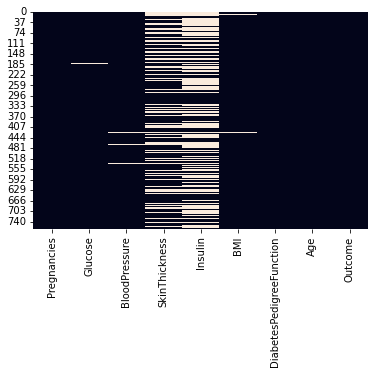

In [409]:
#Use a heatmap to visualize missing data
sns.heatmap(diabetes.isnull(), cbar=False)

In [410]:
#Replace missing values in a Glucose column with mean value
diabetes['Glucose'].fillna(121)

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [411]:
#Replace missing values in a BloodPressure column with mean value
diabetes['BloodPressure'].fillna(32)

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64

In [412]:
#Replace missing values in a SkinThickness column with mean value
diabetes['SkinThickness'].fillna(29)

0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64

In [413]:
#Replace missing values in a Insulin column with mean value
diabetes['Insulin'].fillna(155)

0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64

In [414]:
#Replace missing values in a BMI column with mean value
diabetes['BMI'].fillna(155)

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [415]:
#Exporting cleaned data
#iabetes = diabetes.drop(['log_Age', 'log_Insulin'], axis=1)
diabetes.to_csv("diabetes_cleaned.csv", index=False)

# Exploratory Data Analysis - Visulization
Exploratory data visulization by building graphs to explore data and find patterns.

Preliminary esearch question: How are the diagnostic factors (pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function) affected by age in adult women? 
Independent variable = age
Dependent variable = pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function
I predict that as age increases blood pressure, skin thickness, and BMI would increase.

Age vs. Pregnancies

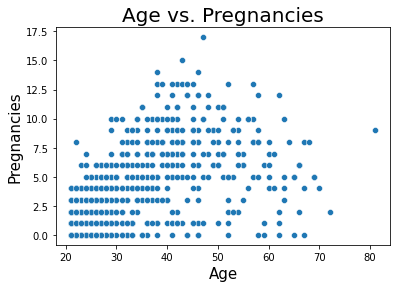

0.5443412284023389


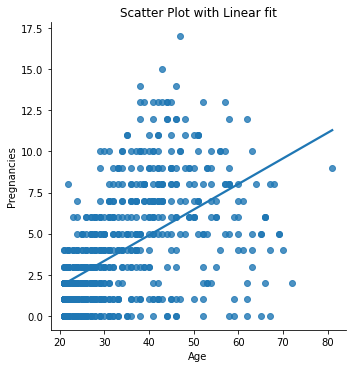

In [416]:
#Exploring possible relationship via scatterplot between x (Age) and y (Pregnancies) variables

age = sns.scatterplot(x='Age', y='Pregnancies', data=diabetes, palette = 'pastel')
plt.title("Age vs. Pregnancies", fontsize = 20) #Title of scatter plot
plt.xlabel("Age", fontsize = 15)#x-axis label
plt.ylabel("Pregnancies", fontsize = 15) #y-axis label
#plt.savefig("Age vs. Pregnancies") #Save generated scatter plot
plt.show() #Show scatter plot

#Basic regression model between x (Age) and y (BMI) variables
BMI_r = sns.lmplot(x='Age', y='Pregnancies', data=diabetes, ci=None)
plt.title("Scatter Plot with Linear fit")

#Pearson Correlation Coefficient (aka Pearson's r) between x (Age) and y (BMI) variables
cor = diabetes['Age'].corr(diabetes['Pregnancies'])
print(cor)

Age vs. Glucose

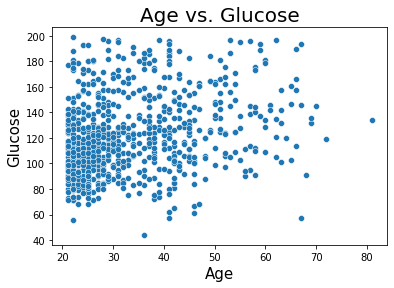

0.2671355547312527


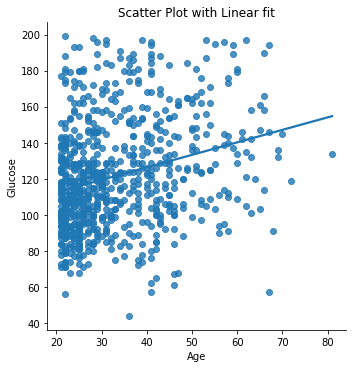

In [417]:
#Exploring possible relationship via scatterplot between x (Age) and y (Glucose) variables

age = sns.scatterplot(x='Age', y='Glucose', data=diabetes, palette = 'pastel')
plt.title("Age vs. Glucose", fontsize = 20) #Title of scatter plot
plt.xlabel("Age", fontsize = 15)#x-axis label
plt.ylabel("Glucose", fontsize = 15) #y-axis label
#plt.savefig("Age vs. Glucose") #Save generated scatter plot
plt.show() #Show scatter plot

#Basic regression model between x (Age) and y (Glucose) variables
BMI_r = sns.lmplot(x='Age', y='Glucose', data=diabetes, ci=None)
plt.title("Scatter Plot with Linear fit")

#Pearson Correlation Coefficient (aka Pearson's r) between x (Age) and y (Glucose) variables
cor = diabetes['Age'].corr(diabetes['Glucose'])
print(cor)

Age vs. BloodPressure

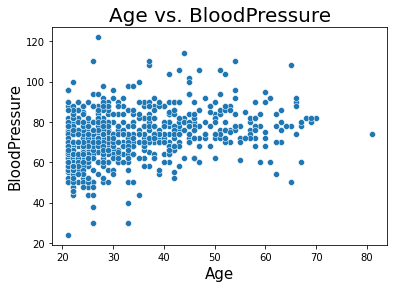

0.3301074252030011


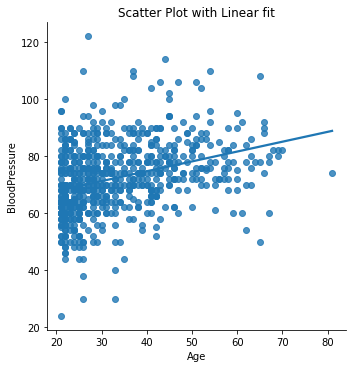

In [418]:
#Exploring possible relationship via scatterplot between x (Age) and y (BloodPressure) variables

age = sns.scatterplot(x='Age', y='BloodPressure', data=diabetes, palette = 'pastel')
plt.title("Age vs. BloodPressure", fontsize = 20) #Title of scatter plot
plt.xlabel("Age", fontsize = 15)#x-axis label
plt.ylabel("BloodPressure", fontsize = 15) #y-axis label
#plt.savefig("Age vs. BloodPressure") #Save generated scatter plot
plt.show() #Show scatter plot

#Basic regression model between x (Age) and y (BloodPressure) variables
BMI_r = sns.lmplot(x='Age', y='BloodPressure', data=diabetes, ci=None)
plt.title("Scatter Plot with Linear fit")

#Pearson Correlation Coefficient (aka Pearson's r) between x (Age) and y (BloodPressure) variables
cor = diabetes['Age'].corr(diabetes['BloodPressure'])
print(cor)

Age vs. SkinThickness

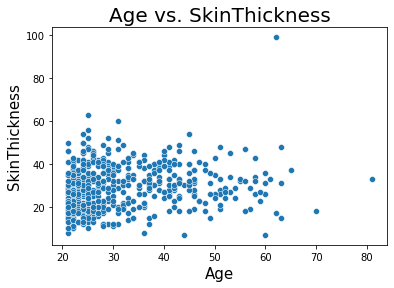

0.16681577419885849


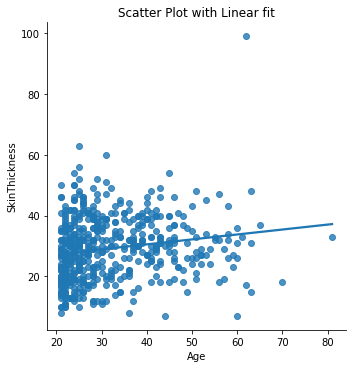

In [419]:
#Exploring possible relationship via scatterplot between x (Age) and y (SkinThickness) variables

age = sns.scatterplot(x='Age', y='SkinThickness', data=diabetes, palette = 'pastel')
plt.title("Age vs. SkinThickness", fontsize = 20) #Title of scatter plot
plt.xlabel("Age", fontsize = 15)#x-axis label
plt.ylabel("SkinThickness", fontsize = 15) #y-axis label
#plt.savefig("Age vs. SkinThickness") #Save generated scatter plot
plt.show() #Show scatter plot

#Basic regression model between x (Age) and y (SkinThickness) variables
BMI_r = sns.lmplot(x='Age', y='SkinThickness', data=diabetes, ci=None)
plt.title("Scatter Plot with Linear fit")

#Pearson Correlation Coefficient (aka Pearson's r) between x (Age) and y (SkinThickness) variables
cor = diabetes['Age'].corr(diabetes['SkinThickness'])
print(cor)

Age vs. Insulin

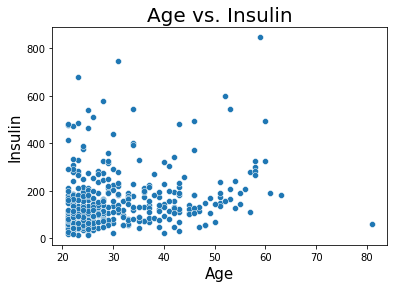

0.22026068477477084


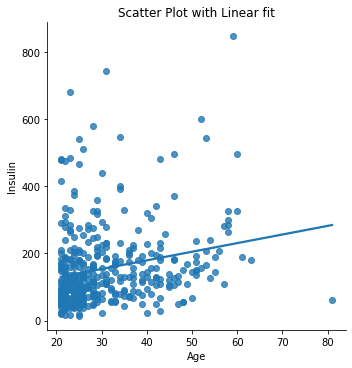

In [420]:
#Exploring possible relationship via scatterplot between x (Age) and y (Insulin) variables

age = sns.scatterplot(x='Age', y='Insulin', data=diabetes, palette = 'pastel')
plt.title("Age vs. Insulin", fontsize = 20) #Title of scatter plot
plt.xlabel("Age", fontsize = 15)#x-axis label
plt.ylabel("Insulin", fontsize = 15) #y-axis label
#plt.savefig("Age vs. Insulin") #Save generated scatter plot
plt.show() #Show scatter plot

#Basic regression model between x (Age) and y (Insulin) variables
BMI_r = sns.lmplot(x='Age', y='Insulin', data=diabetes, ci=None)
plt.title("Scatter Plot with Linear fit")

#Pearson Correlation Coefficient (aka Pearson's r) between x (Age) and y (Insulin) variables
cor = diabetes['Age'].corr(diabetes['Insulin'])
print(cor)

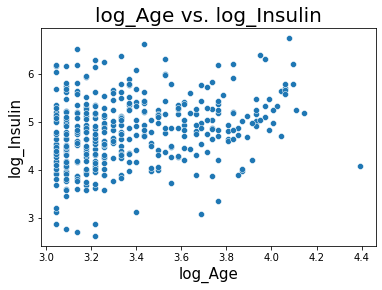

0.26072376210476444


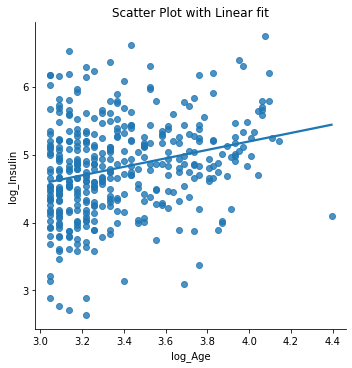

In [421]:
#Testing if np.log on age and insulin would make a difference
diabetes['log_Age'] = np.log(diabetes['Age'])
diabetes['log_Insulin'] = np.log(diabetes['Insulin'])

age = sns.scatterplot(x='log_Age', y='log_Insulin', data=diabetes, palette = 'pastel')
plt.title("log_Age vs. log_Insulin", fontsize = 20) #Title of scatter plot
plt.xlabel("log_Age", fontsize = 15)#x-axis label
plt.ylabel("log_Insulin", fontsize = 15) #y-axis label
#plt.savefig("Age vs. Insulin") #Save generated scatter plot
plt.show() #Show scatter plot

#Basic regression model between x (Age) and y (Insulin) variables
BMI_r = sns.lmplot(x='log_Age', y='log_Insulin', data=diabetes, ci=None)
plt.title("Scatter Plot with Linear fit")

#Pearson Correlation Coefficient (aka Pearson's r) between x (Age) and y (Insulin) variables
cor = diabetes['log_Age'].corr(diabetes['log_Insulin'])
print(cor)

Age vs. BMI

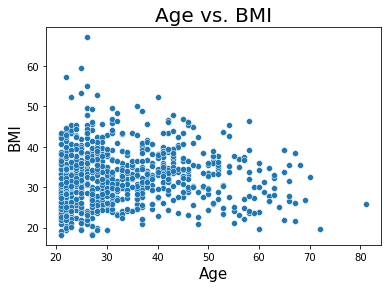

0.02584145816926202


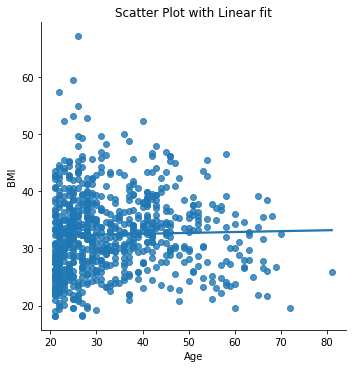

In [422]:
#Exploring possible relationship via scatterplot between x (Age) and y (BMI) variables

age = sns.scatterplot(x='Age', y='BMI', data=diabetes, palette = 'pastel')
plt.title("Age vs. BMI", fontsize = 20) #Title of scatter plot
plt.xlabel("Age", fontsize = 15) #x-axis label
plt.ylabel("BMI", fontsize = 15) #y-axis label
#plt.savefig("Age vs. BMI") #Save generated scatter plot
plt.show() #Show scatter plot

#Basic regression model between x (Age) and y (BMI) variables
BMI_r = sns.lmplot(x='Age', y='BMI', data=diabetes, ci=None)
plt.title("Scatter Plot with Linear fit")

#Pearson Correlation Coefficient (aka Pearson's r) between x (Age) and y (BMI) variables
cor = diabetes['Age'].corr(diabetes['BMI'])
print(cor)

Age vs. DiabetesPedigreeFunction

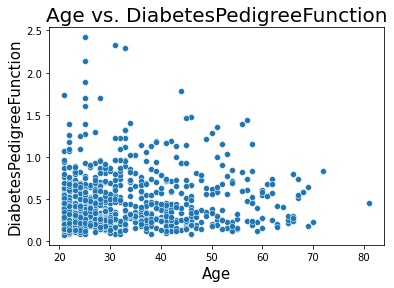

0.033561312434805514


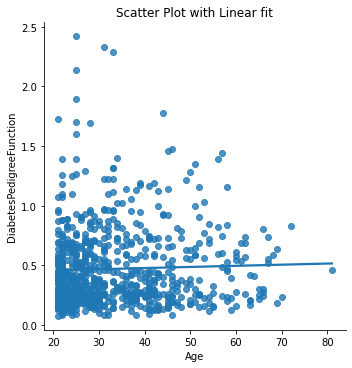

In [423]:
#Exploring possible relationship via scatterplot between x (Age) and y (DiabetesPedigreeFunction) variables

age = sns.scatterplot(x='Age', y='DiabetesPedigreeFunction', data=diabetes, palette = 'pastel')
plt.title("Age vs. DiabetesPedigreeFunction", fontsize = 20) #Title of scatter plot
plt.xlabel("Age", fontsize = 15)#x-axis label
plt.ylabel("DiabetesPedigreeFunction", fontsize = 15) #y-axis label
#plt.savefig("Age vs. DiabetesPedigreeFunction") #Save generated scatter plot
plt.show() #Show scatter plot

#Basic regression model between x (Age) and y (DiabetesPedigreeFunction) variables
BMI_r = sns.lmplot(x='Age', y='DiabetesPedigreeFunction', data=diabetes, ci=None)
plt.title("Scatter Plot with Linear fit")

#Pearson Correlation Coefficient (aka Pearson's r) between x (Age) and y (DiabetesPedigreeFunction) variables
cor = diabetes['Age'].corr(diabetes['DiabetesPedigreeFunction'])
print(cor)

In [424]:
diabetes = diabetes.drop(['log_Age', 'log_Insulin'], axis=1)

# Result of Exploratory Data Analysis - Visualizations
Contrary to predictions age is not highly corrrelated with any diagnostic measurements, including the predicted factors of blood pressure, skin thickness, and BMI.

In [425]:
#Comparing correlatons between independent variable of age and dependent variables
corr = {'Independent Variable': ['Age', 'Age', 'Age', 'Age', 'Age', 'Age', 'Age'],
        'Dependent Variable': ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'],
        'Pearson Correlation Coefficient' : [0.54, 0.27, 0.33, 0.17, 0.22, 0.25, 0.04],
        'Linear Association Between Variables' : ['moderate +', 'weak +', 'weak +', 'weak +', 'weak +', 'weak +', 'weak +']}
df_corr = pd.DataFrame(corr)
display(df_corr)

,Independent Variable,Dependent Variable,Pearson Correlation Coefficient,Linear Association Between Variables
0,Age,Pregnancies,0.54,moderate +
1,Age,Glucose,0.27,weak +
2,Age,BloodPressure,0.33,weak +
3,Age,SkinThickness,0.17,weak +
4,Age,Insulin,0.22,weak +
5,Age,BMI,0.25,weak +
6,Age,DiabetesPedigreeFunction,0.04,weak +


In [426]:
#Overview of all correlations between all pairs of numerical columns
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


Glucose with Insulin 0.58
Glucose with Outcome 0.49
SkinThickness with BMI 0.64
Insulin with Outcome 0.30
BMI with Outcome 0.31
Age with Pregnancies 0.544

Glucose, insulin, age indicators of Diabetes (Outcome)?

In [427]:
diabetes.corr()[['Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age']]

,Glucose,SkinThickness,Insulin,BMI,Age
Pregnancies,0.128135,0.100239,0.082171,0.021719,0.544341
Glucose,1.000000,0.228043,0.581186,0.232771,0.267136
BloodPressure,0.223192,0.226839,0.098272,0.289230,0.330107
SkinThickness,0.228043,1.000000,0.184888,0.648214,0.166816
Insulin,0.581186,0.184888,1.000000,0.228050,0.220261
BMI,0.232771,0.648214,0.228050,1.000000,0.025841
DiabetesPedigreeFunction,0.137246,0.115016,0.130395,0.155382,0.033561
Age,0.267136,0.166816,0.220261,0.025841,1.000000
Outcome,0.494650,0.259491,0.303454,0.313680,0.238356


# Multiple Linear Regression
What is the effect of SkinThickness on BMI?
What is the effect of Insulin on Glucose?
Does outcome (diabetes) effect either of those attributes?

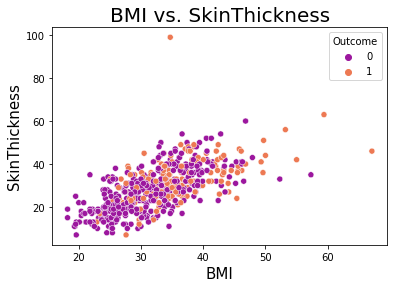

0.6482139430923206


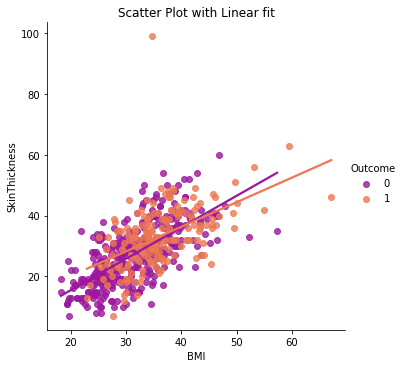

In [428]:
#Exploring possible relationship via scatterplot between x (BMI) and y (SkinThickness) variables

age = sns.scatterplot(x='BMI', y='SkinThickness', hue='Outcome', data=diabetes, palette = 'plasma')
plt.title("BMI vs. SkinThickness", fontsize = 20) #Title of scatter plot
plt.xlabel("BMI", fontsize = 15)#x-axis label
plt.ylabel("SkinThickness", fontsize = 15) #y-axis label
#plt.savefig("Age vs. DiabetesPedigreeFunction") #Save generated scatter plot
plt.show() #Show scatter plot

#Basic regression model between x (Age) and y (DiabetesPedigreeFunction) variables
BMI_r = sns.lmplot(x='BMI', y='SkinThickness', hue='Outcome', data=diabetes, palette = 'plasma', ci=None)
plt.title("Scatter Plot with Linear fit")

#Pearson Correlation Coefficient (aka Pearson's r) between x (Age) and y (DiabetesPedigreeFunction) variables
cor = diabetes['BMI'].corr(diabetes['SkinThickness'])
print(cor)

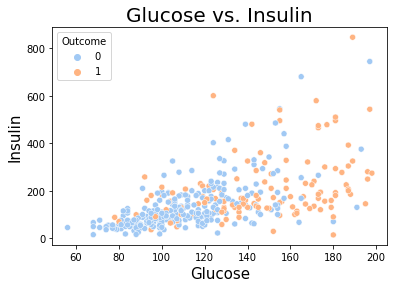

0.5811862089121648


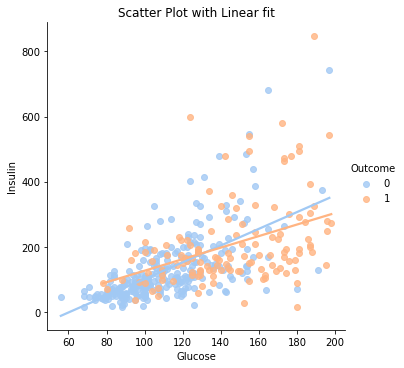

In [429]:
#Exploring possible relationship via scatterplot between x (Glucose) and y (Insulin) variables

age = sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=diabetes, palette = 'pastel')
plt.title("Glucose vs. Insulin", fontsize = 20) #Title of scatter plot
plt.xlabel("Glucose", fontsize = 15)#x-axis label
plt.ylabel("Insulin", fontsize = 15) #y-axis label
#plt.savefig("Age vs. DiabetesPedigreeFunction") #Save generated scatter plot
plt.show() #Show scatter plot

#Basic regression model between x (Age) and y (DiabetesPedigreeFunction) variables
BMI_r = sns.lmplot(x='Glucose', y='Insulin', hue='Outcome', data=diabetes, palette = 'pastel', ci=None)
plt.title("Scatter Plot with Linear fit")

#Pearson Correlation Coefficient (aka Pearson's r) between x (Age) and y (DiabetesPedigreeFunction) variables
cor = diabetes['Glucose'].corr(diabetes['Insulin'])
print(cor)

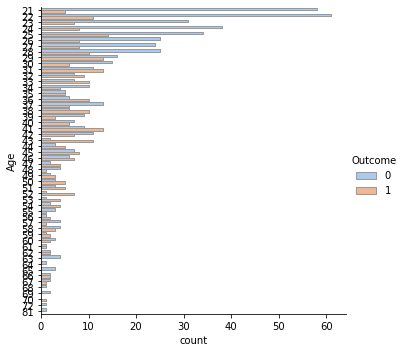

In [430]:
#Does diabetes increase with age?
sns.catplot(y="Age", hue="Outcome", kind="count",
            palette="pastel", edgecolor=".6",
            data=diabetes)

Seems like outcome (diabetes) does not seem to influence the trend. Though I still wonder if any of the attributes (BMI, Skin Thickness, Glucose, Insulin) affect diabetes outcomes?
I'll conduct t-tests to investigate futher.

# Exploratory Data Analysis - T-test
The null hypothesis (H0) is that the true difference of BMI between these group means (with diabetes and without diabetes) is zero. µa = µb
The alternate hypothesis (Ha) is that the true difference is different from zero. µa ≠ µb


In [431]:
sort = diabetes.sort_values('Outcome', axis = 0, ascending = True)
print(sort)
#Exporting sorted data by outcome
#sort.to_csv("diabetes_sort by outcome.csv", index=False)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
383            1     90.0           62.0           18.0     59.0  25.1   
465            0    124.0           56.0           13.0    105.0  21.8   
466            0     74.0           52.0           10.0     36.0  27.8   
467            0     97.0           64.0           36.0    100.0  36.8   
469            6    154.0           78.0           41.0    140.0  46.1   
..           ...      ...            ...            ...      ...   ...   
193           11    135.0            NaN            NaN      NaN  52.3   
485            0    135.0           68.0           42.0    250.0  42.3   
484            0    145.0            NaN            NaN      NaN  44.2   
186            8    181.0           68.0           36.0    495.0  30.1   
0              6    148.0           72.0           35.0      NaN  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
383                     1.268   25        0  
465                

In [432]:
df_0 = diabetes[diabetes['Outcome'] == 0]
df_0_drop = df_0.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age'], axis=1)
df_0_drop


,BMI,Outcome
1,26.6,0
3,28.1,0
5,25.6,0
7,35.3,0
10,37.6,0
...,...,...
762,22.5,0
763,32.9,0
764,36.8,0
765,26.2,0


In [433]:
df_1 = diabetes[diabetes['Outcome'] == 1]
df_1_drop = df_1.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age'], axis=1)
df_1_drop

,BMI,Outcome
0,33.6,1
2,23.3,1
4,43.1,1
6,31.0,1
8,30.5,1
...,...,...
755,36.5,1
757,36.3,1
759,35.5,1
761,44.0,1


In [434]:
#Creating random samples from pandas dataframe of NO diabetes group
sampleData_0 = df_0_drop.sample(n=250, random_state=5);
print(sampleData_0)

      BMI  Outcome
389  31.6        0
684   NaN        0
119  23.2        0
345  38.5        0
735  35.4        0
..    ...      ...
428  40.6        0
747  46.3        0
352  34.4        0
452  39.9        0
411  34.4        0

[250 rows x 2 columns]


In [435]:
mean_group_0 = sampleData_0.mean()
print(mean_group_0)

BMI        31.160905
Outcome     0.000000
dtype: float64


In [436]:
#Creating random samples from pandas dataframe of YES diabetes group
sampleData_1 = df_1_drop.sample(n=250, random_state=5);
print(sampleData_1)

      BMI  Outcome
435  42.4        1
580  42.1        1
515  31.6        1
187  32.0        1
443  30.5        1
..    ...      ...
468  30.0        1
186  30.1        1
588  33.3        1
592  34.4        1
120  53.2        1

[250 rows x 2 columns]


In [437]:
mean_group_1 = sampleData_1.mean()
print(mean_group_1)

BMI        35.485887
Outcome     1.000000
dtype: float64


In [438]:
#Find variance for both groups
print(np.var(sampleData_0), np.var(sampleData_1))

BMI        39.544603
Outcome     0.000000
dtype: float64 BMI        44.341696
Outcome     0.000000
dtype: float64


In [439]:
#The ratio of larger sample variance to the smaller sample variance. To check if the reatio is small enough to perform a standard independent 2 sample t-test that assumes equal population variance.
44.34/39.54

1.1213960546282247

In [440]:
#Converting data frame of negative diabetes samples to array
#group_0 = sampleData_0.to_numpy()
#group_0

#Converting data frame of positive diabetes samples to array
#group_1 = sampleData_1.to_numpy()
#group_1

In [441]:
#Two sample t-test
#To test if the two population means are equal
tStat, pValue = stats.ttest_ind(a=sampleData_0['BMI'], b=sampleData_1['BMI'], equal_var=True, nan_policy='omit')
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #Pint the P-Value and the T-Statistic

P-Value:6.792503603356977e-13 T-Statistic:-7.38123882107828


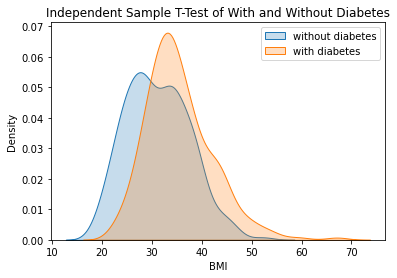

In [442]:
sns.kdeplot(data=sampleData_0['BMI'], shade=True, palette='crest', label='without diabetes')
sns.kdeplot(data=sampleData_1['BMI'], shade=True, label='with diabetes')
plt.title("Independent Sample T-Test of With and Without Diabetes")
plt.legend()

P-Value of 6.79 is more than alpha = 0.05 so we can not reject the null hypothesis that the BMI is the same for those with diabetes versus those without diabetes.
There is not enough evidence that BMI does affect diabetes outcomes.

# ANOVA

In [443]:
#Import clean csv file as pandas dataframe
diabetes_c = pd.read_csv('diabetes_cleaned.csv')
diabetes_c.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [444]:
#Changing BMI to categorical variable
def label(element):
    if element < 18.4:
        return 'Underweight'
    elif 18.5 < element < 24.9:
        return 'Normal'
    elif 25.0 < element < 29.9:
        return 'Overweight'
    elif 30 < element < 39.9:
        return 'Obese'
    else:
        return 'Morbidly Obese'
BMICategory = diabetes_c['BMI'].apply(label)
BMICategory 

0               Obese
1          Overweight
2              Normal
3          Overweight
4      Morbidly Obese
            ...      
763             Obese
764             Obese
765        Overweight
766             Obese
767             Obese
Name: BMI, Length: 768, dtype: object

In [445]:
#Add newly created BMI category as column of cleaned dataset
diabetes_c['BMICategory'] = diabetes_c['BMI'].apply(label)
diabetes_c.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICategory
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Morbidly Obese


In [446]:
BMI_vs_SkinThickness = pd.melt(diabetes_c, id_vars=['BMICategory'], value_vars=['SkinThickness'])
BMI_vs_SkinThickness 

,BMICategory,variable,value
0,Obese,SkinThickness,35.0
1,Overweight,SkinThickness,29.0
2,Normal,SkinThickness,NaN
3,Overweight,SkinThickness,23.0
4,Morbidly Obese,SkinThickness,35.0
...,...,...,...
763,Obese,SkinThickness,48.0
764,Obese,SkinThickness,27.0
765,Overweight,SkinThickness,23.0
766,Obese,SkinThickness,NaN


<AxesSubplot:title={'center':'value'}, xlabel='[BMICategory]'>

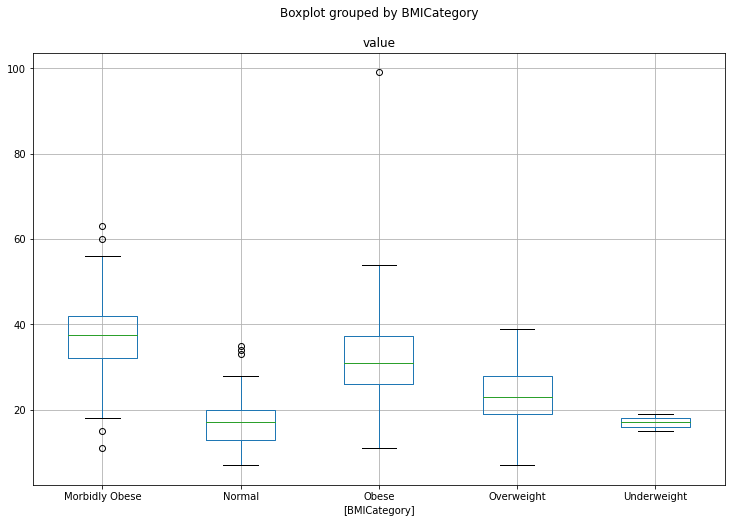

In [447]:
#Create a boxplot
BMI_vs_SkinThickness.boxplot(['value'], by=['BMICategory'], figsize=(12, 8))

In [448]:
ctrl = BMI_vs_SkinThickness['value'][BMI_vs_SkinThickness.BMICategory == 'Normal']

grps = pd.unique(BMI_vs_SkinThickness.BMICategory.values)
d_BMI_vs_SkinThickness = {grp:BMI_vs_SkinThickness['value'][BMI_vs_SkinThickness.BMICategory == grp] for grp in grps}

k = len(pd.unique(BMI_vs_SkinThickness.BMICategory))  #Number of conditions
N = len(BMI_vs_SkinThickness.values)  #Conditions times participants
n = BMI_vs_SkinThickness.groupby('BMICategory').size()[0] #Participants in each condition

In [449]:
F, p = stats.f_oneway(d_BMI_vs_SkinThickness['Morbidly Obese'], d_BMI_vs_SkinThickness['Normal'], d_BMI_vs_SkinThickness['Obese'], d_BMI_vs_SkinThickness['Overweight'], d_BMI_vs_SkinThickness['Underweight'])

In [450]:
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

In [451]:
SSbetween = (sum(BMI_vs_SkinThickness.groupby('BMICategory').sum()['value']**2)/n) \
    - (BMI_vs_SkinThickness['value'].sum()**2)/N

In [452]:
#Calculate within sum of squares
sum_y_squared = sum([value**2 for value in BMI_vs_SkinThickness['value'].values])
SSwithin = sum_y_squared - sum(BMI_vs_SkinThickness.groupby('BMICategory').sum()['value']**2)/n

In [453]:
#Calculate total sum of squares
SStotal = sum_y_squared - (BMI_vs_SkinThickness['value'].sum()**2)/N

In [454]:
#Calculate mean square within and between
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

In [455]:
#Calculate F test
F = MSbetween/MSwithin

In [456]:
#Calculate p value
p = stats.f.sf(F, DFbetween, DFwithin)

In [457]:
#Calculate effect size (eta squared)
eta_sqrd = SSbetween/SStotal

In [458]:
#Calculate omega squared
om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

In [459]:
#ANOVA simple table
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('value ~ BMICategory',
                data=BMI_vs_SkinThickness).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq     df          F        PR(>F)
BMICategory  20062.451744    4.0  68.560167  7.413373e-47
Residual     39211.814430  536.0        NaN           NaN


In [460]:
#Post hoc corrections (Bonferroni)
pair_t = mod.t_test_pairwise('BMICategory')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Normal-Morbidly Obese,-19.434884,1.438725,-13.508412,5.369092e-36,-22.261114,-16.608654,0.000000,True
Obese-Morbidly Obese,-5.086354,1.058118,-4.806984,1.992906e-06,-7.164920,-3.007789,0.000012,True
Overweight-Morbidly Obese,-13.836537,1.206339,-11.469859,2.186669e-27,-16.206268,-11.466805,0.000000,True
Underweight-Morbidly Obese,-20.034884,6.117911,-3.274791,1.125690e-03,-32.052907,-8.016860,0.004495,True
Obese-Normal,14.348529,1.219930,11.761761,1.428333e-28,11.952099,16.744960,0.000000,True
Overweight-Normal,5.598347,1.350508,4.145365,3.943041e-05,2.945410,8.251284,0.000197,True
Underweight-Normal,-0.600000,6.147964,-0.097593,9.222917e-01,-12.677058,11.477058,0.922292,False
Overweight-Obese,-8.750182,0.934642,-9.362070,2.141662e-19,-10.586192,-6.914172,0.000000,True
Underweight-Obese,-14.948529,6.070185,-2.462615,1.410619e-02,-26.872798,-3.024260,0.041724,True
Underweight-Overweight,-6.198347,6.097769,-1.016494,3.098527e-01,-18.176802,5.780108,0.523697,False


In [462]:
#Post hoc tests: tukey hsd
#Tukey hsd with bonferroni's correction
pair_t = mod.t_test_pairwise('BMICategory')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Normal-Morbidly Obese,-19.434884,1.438725,-13.508412,5.369092e-36,-22.261114,-16.608654,0.000000,True
Obese-Morbidly Obese,-5.086354,1.058118,-4.806984,1.992906e-06,-7.164920,-3.007789,0.000012,True
Overweight-Morbidly Obese,-13.836537,1.206339,-11.469859,2.186669e-27,-16.206268,-11.466805,0.000000,True
Underweight-Morbidly Obese,-20.034884,6.117911,-3.274791,1.125690e-03,-32.052907,-8.016860,0.004495,True
Obese-Normal,14.348529,1.219930,11.761761,1.428333e-28,11.952099,16.744960,0.000000,True
Overweight-Normal,5.598347,1.350508,4.145365,3.943041e-05,2.945410,8.251284,0.000197,True
Underweight-Normal,-0.600000,6.147964,-0.097593,9.222917e-01,-12.677058,11.477058,0.922292,False
Overweight-Obese,-8.750182,0.934642,-9.362070,2.141662e-19,-10.586192,-6.914172,0.000000,True
Underweight-Obese,-14.948529,6.070185,-2.462615,1.410619e-02,-26.872798,-3.024260,0.041724,True
Underweight-Overweight,-6.198347,6.097769,-1.016494,3.098527e-01,-18.176802,5.780108,0.523697,False


In [464]:
aov = pg.anova(data=BMI_vs_SkinThickness, dv='value',between='BMICategory',detailed=True)
print(aov)

        Source            SS   DF           MS          F         p-unc  \
0  BMICategory  20062.451744    4  5015.612936  68.560167  7.413373e-47   
1       Within  39211.814430  536    73.156370        NaN           NaN   

        np2  
0  0.338468  
1       NaN  


In [465]:
#Post hoc test with pingouin
#cohen = effect size
pt = pg.pairwise_tukey(dv='value',between='BMICategory',effsize='cohen',data=BMI_vs_SkinThickness)
print(pt)

                A            B    mean(A)    mean(B)       diff        se  \
0  Morbidly Obese       Normal  37.034884  17.600000  19.434884  1.438725   
1  Morbidly Obese        Obese  37.034884  31.948529   5.086354  1.058118   
2  Morbidly Obese   Overweight  37.034884  23.198347  13.836537  1.206339   
3  Morbidly Obese  Underweight  37.034884  17.000000  20.034884  6.117911   
4          Normal        Obese  17.600000  31.948529 -14.348529  1.219930   
5          Normal   Overweight  17.600000  23.198347  -5.598347  1.350508   
6          Normal  Underweight  17.600000  17.000000   0.600000  6.147964   
7           Obese   Overweight  31.948529  23.198347   8.750182  0.934642   
8           Obese  Underweight  31.948529  17.000000  14.948529  6.070185   
9      Overweight  Underweight  23.198347  17.000000   6.198347  6.097769   

           T       p-tukey     cohen  
0  13.508412  8.271162e-14  2.272249  
1   4.806984  1.963678e-05  0.594676  
2  11.469859  8.271162e-14  1.61771